In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [128]:
df = pd.read_csv('flights_clean.csv')
df.drop_duplicates(inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,2008,1,3,4,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [129]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
dtype: int64

In [130]:
df.shape

(1928366, 18)

In [131]:
df[df.ArrDelay<=0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
10,2008,1,3,4,07:54,07:45,09:40,09:55,WN,1144,N778SW,226.0,250.0,-15.0,9.0,IND,PHX,1489
15,2008,1,3,4,10:39,10:30,11:33,11:40,WN,1244,N714CB,54.0,70.0,-7.0,9.0,ISP,BWI,220
20,2008,1,3,4,13:12,13:00,15:46,15:50,WN,1397,N247WN,154.0,170.0,-4.0,12.0,ISP,MCO,972
21,2008,1,3,4,14:49,14:30,17:15,17:20,WN,3398,N707SA,146.0,170.0,-5.0,19.0,ISP,MCO,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928335,2008,12,13,6,15:23,15:15,18:22,18:34,DL,1439,N634DL,179.0,199.0,-12.0,8.0,BOS,MCO,1121
1928339,2008,12,13,6,11:08,11:00,13:56,14:24,DL,1459,N955DL,168.0,204.0,-28.0,8.0,LGA,FLL,1076
1928343,2008,12,13,6,07:19,07:10,09:38,09:49,DL,1491,N935DL,199.0,219.0,-11.0,9.0,LGA,MSY,1183
1928358,2008,12,13,6,15:31,15:22,18:22,18:23,DL,1612,N916DN,111.0,121.0,-1.0,9.0,MCI,ATL,692


+ quan els vols no arriven amb retard el ArrDelay es zero o amb valors negatius

### Nivell 1

- Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

- Exercici 2

Crea una nova variable segons si el vol ha arribat tard o no (ArrDelay > 0).


In [133]:
# 0 means no delay, 1 means delay
df['target']=df['ArrDelay'].apply(lambda x: 0 if x <=0 else 1)

In [134]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,target
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810,0
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810,1
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515,1
3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515,1
4,2008,1,3,4,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688,1


In [135]:
df.target.value_counts(normalize=True).round(2)

1    0.89
0    0.11
Name: target, dtype: float64

+ data shows 89% of observations with delay (label 1)  and 11 % observation without delay (label 0)
+ imbalance dataset
+ si tenemos accuracy alrededor del 89% sera un resultado poco fiable debido a este imbalance


- Exercici 3

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [137]:
logistic = LogisticRegression()
neighbor = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [138]:
X = df[['ActualElapsedTime','DepDelay','Distance']]

<AxesSubplot:>

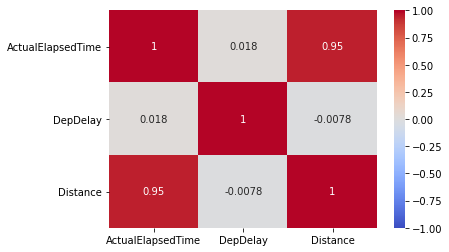

In [140]:
corr = X.corr()
sns.heatmap(corr,cmap='coolwarm',vmin=-1,vmax=1,annot=True)

+ per ara no treiem cap altre variable

In [141]:
y = df['target']

In [142]:
def analyze_clasification_model(model,X,y):
    print(model)
    model.fit(X,y)    
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y,y_pred,normalize='true')
    print(conf_matrix)
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Precision : {precision_score(y,y_pred)}')
    print(f'recall (sensitivity) : {recall_score(y,y_pred)}')
    print(f'ROC - AUC: {roc_auc_score(y,y_pred)}')
    
    plot_confusion_matrix(model,X,y,normalize='true')
    

LogisticRegression()
[[0.28338277 0.71661723]
 [0.01757446 0.98242554]]
Accuracy : 0.908127917625596
Precision : 0.9201765002877722
recall (sensitivity) : 0.9824255400630146
ROC - AUC: 0.6329041574512462


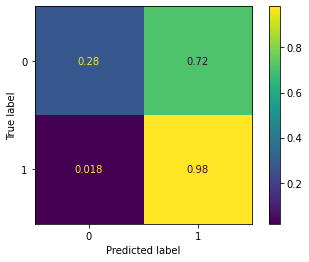

In [143]:
analyze_clasification_model(logistic,X,y)

KNeighborsClassifier()
[[0.59180019 0.40819981]
 [0.02273922 0.97726078]]
Accuracy : 0.9362921769000283
Precision : 0.9526761936869161
recall (sensitivity) : 0.9772607795011053
ROC - AUC: 0.7845304853808344


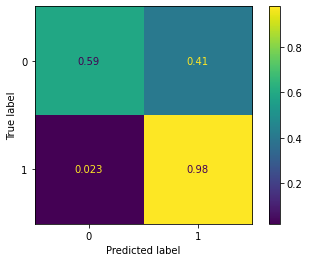

In [144]:
analyze_clasification_model(neighbor,X,y)

DecisionTreeClassifier()
[[0.82388903 0.17611097]
 [0.02541995 0.97458005]]
Accuracy : 0.9585638825824558
Precision : 0.9789618906845968
recall (sensitivity) : 0.9745800476961373
ROC - AUC: 0.8992345387683441


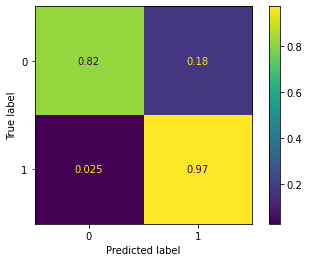

In [145]:
analyze_clasification_model(tree,X,y)

### El mejor modelo por ahora es Decision Tree, desde un punto de vista de accuracy, precision y recall y ROC-AUC, pero como no hay train/test seguramente hay overfitting en algun sitio



- Exercici 4

Entrena’ls utilitzant els diferents paràmetres que admeten.



In [146]:
# display all possible parameters
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LogisticRegression(C=0.1, max_iter=50, n_jobs=10)
[[0.28152384 0.71847616]
 [0.01742418 0.98257582]]
Accuracy : 0.9080646516273363
Precision : 0.9199972618175121
recall (sensitivity) : 0.982575823512687
ROC - AUC: 0.6320498313878742


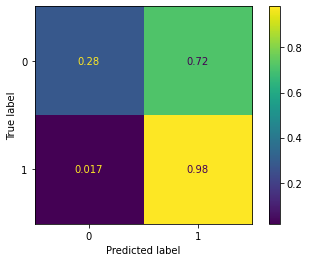

In [147]:
logistic_1 = LogisticRegression(C=0.1,n_jobs=10,max_iter=50)
analyze_clasification_model(logistic_1,X,y)

+ no hay mucha diferencia en los resultados al variar varios parametros y comparar con los resultados del modelo inicial

In [148]:
# display all possible parameters
neighbor.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

KNeighborsClassifier(n_jobs=10, n_neighbors=10)
[[0.59050723 0.40949277]
 [0.02973001 0.97026999]]
Accuracy : 0.929906978239608
Precision : 0.9522077602598028
recall (sensitivity) : 0.9702699879889289
ROC - AUC: 0.7803886094046013


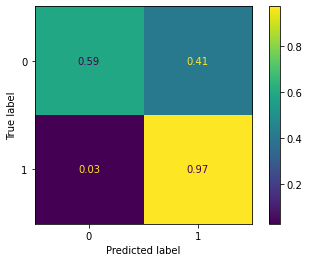

In [149]:
neighbor_1 = KNeighborsClassifier(n_neighbors=10,n_jobs=10)
analyze_clasification_model(neighbor_1,X,y)

+ usando 10 neighbors en vez del default n =5 los resultados no varian mucho cambiando los parametros

In [150]:
# display all possible parameters
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=5)
[[0.31519448 0.68480552]
 [0.02107566 0.97892434]]
Accuracy : 0.9083799444711221
Precision : 0.9231959628836577
recall (sensitivity) : 0.9789243418571321
ROC - AUC: 0.6470594113118678


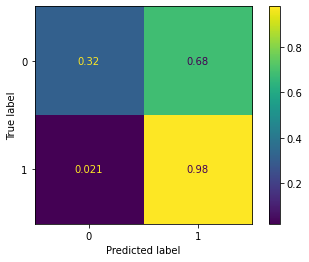

In [151]:
tree_1 = DecisionTreeClassifier(max_depth=10, min_samples_split=5,max_features='auto')
analyze_clasification_model(tree_1,X,y)

+ hay bastante diferencia al cambiar los parametros x defecto. Hay que prestar atencion al ver que parametros usamos


- Exercici 5

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [154]:
def analyze_clasification_model_1(model,X_train,X_test,y_train,y_test):
    print(model)
    model.fit(X_train,y_train)    
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')
    print(conf_matrix)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
    print(f'Precision : {precision_score(y_test,y_pred)}')
    print(f'recall (sensitivity) : {recall_score(y_test,y_pred)}')
    print(f'ROC - AUC: {roc_auc_score(y_test,y_pred)}')
    
    plot_confusion_matrix(model,X_test,y_test,normalize='true')    

In [155]:
tree = DecisionTreeClassifier()

DecisionTreeClassifier()
[[0.55039277 0.44960723]
 [0.06355423 0.93644577]]
Accuracy : 0.8954140810011927
Precision : 0.9459857095127284
recall (sensitivity) : 0.9364457674029976
ROC - AUC: 0.7434192666767618


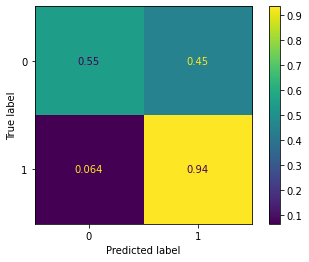

In [157]:
analyze_clasification_model_1(tree,X_train,X_test,y_train,y_test)

+ el rendimiento de DecisionTreeClassifier es peor que antes como es de esperar, ya que al no separar entre train y test debiamos estar haciendo overfitting

### Nivell 2

- Exercici 6

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [158]:
X.head()

,ActualElapsedTime,DepDelay,Distance
0,128.0,8.0,810
1,128.0,19.0,810
2,96.0,8.0,515
3,90.0,34.0,515
4,101.0,25.0,688


In [159]:
X['speed'] = X['Distance'] / (X['ActualElapsedTime']/60) # miles/hour

<ipython-input-159-69cd993b6eb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['speed'] = X['Distance'] / (X['ActualElapsedTime']/60) # miles/hour


In [160]:
X.head()

,ActualElapsedTime,DepDelay,Distance,speed
0,128.0,8.0,810,379.687500
1,128.0,19.0,810,379.687500
2,96.0,8.0,515,321.875000
3,90.0,34.0,515,343.333333
4,101.0,25.0,688,408.712871


In [161]:
from sklearn.preprocessing import RobustScaler

In [162]:
transformer = RobustScaler()

In [163]:
X_new = pd.DataFrame(transformer.fit_transform(X),columns=X.columns)

In [164]:
X_new.head()

,ActualElapsedTime,DepDelay,Distance,speed
0,0.141176,-0.390244,0.309560,0.461180
1,0.141176,-0.121951,0.309560,0.461180
2,-0.235294,-0.390244,-0.138088,-0.002147
3,-0.305882,0.243902,-0.138088,0.169827
4,-0.176471,0.024390,0.124431,0.693799


In [165]:
X_train, X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3)

DecisionTreeClassifier()
[[0.53898382 0.46101618]
 [0.06372619 0.93627381]]
Accuracy : 0.8939949179789459
Precision : 0.9446080583935907
recall (sensitivity) : 0.93627380809601
ROC - AUC: 0.7376288149049993


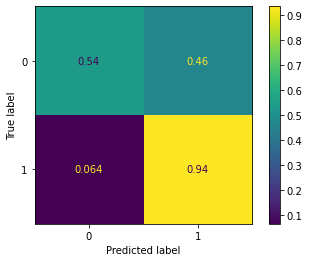

In [166]:
analyze_clasification_model_1(tree,X_train,X_test,y_train,y_test)

+ despues de aplicar un RobustScaler no veo que haya mejorado mucho la prediccion. Es normal?

### Nivell 3

- Exercici 7

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [169]:
X_1 = X_new.drop('DepDelay',axis=1) # remove DepDelay
X_1.head()

,ActualElapsedTime,Distance,speed
0,0.141176,0.309560,0.461180
1,0.141176,0.309560,0.461180
2,-0.235294,-0.138088,-0.002147
3,-0.305882,-0.138088,0.169827
4,-0.176471,0.124431,0.693799


In [170]:
#split train,test sets
X_train, X_test,y_train,y_test = train_test_split(X_1,y,test_size=0.3)

DecisionTreeClassifier()
[[0.07776559 0.92223441]
 [0.01694145 0.98305855]]
Accuracy : 0.8874747195381238
Precision : 0.9002980562625443
recall (sensitivity) : 0.9830585452303601
ROC - AUC: 0.5304120675923415


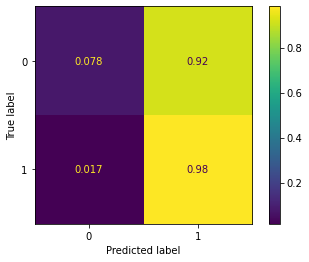

In [171]:
analyze_clasification_model_1(tree,X_train,X_test,y_train,y_test)

+ la prediccion empeora muchissimo al quitar la variable DepDelay

In [172]:
from sklearn.model_selection import cross_val_score

In [179]:
cross_val_score(tree, X_1, y, cv=5, scoring='roc_auc')

array([0.73545371, 0.74415186, 0.72990951, 0.71424627, 0.72898331])